In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
xrange = np.linspace(85.0, 95.0, 10)
yrange = np.linspace(-8.0, -12.0, 5)

In [3]:
data = zip(np.random.choice(xrange, size=300),np.random.choice(yrange, size=300),2.0E9 * np.random.normal(1.0,0.2,300))
data = list(data)
data = np.array(data)

In [4]:
def gaussian(x, sigma, mu):
          return np.exp(-np.power((x - mu), 2.0)/(2*np.power(sigma,2.0)))

In [5]:
for point in data:
    point[2] = point[2] * gaussian(point[0], 2.0, 90) * gaussian(point[1], 1.0, -10.0)

In [6]:
df = pd.DataFrame(data,columns=["freq", "pow", "Nfit"])

In [7]:
df

,freq,pow,Nfit
0,95.000000,-11.0,3.685167e+07
1,85.000000,-11.0,6.611662e+07
2,85.000000,-12.0,1.193293e+07
3,86.111111,-9.0,8.849031e+07
4,91.666667,-9.0,7.509255e+08
...,...,...,...
295,92.777778,-10.0,8.522094e+08
296,92.777778,-9.0,6.110115e+08
297,89.444444,-9.0,1.268103e+09
298,86.111111,-10.0,3.666731e+08


In [9]:
df.groupby(["freq","pow"]).mean().sort_values(by=["Nfit"],ascending=False)

,,Nfit
freq,pow,
90.555556,-10.0,2.146659e+09
89.444444,-10.0,2.092621e+09
91.666667,-10.0,1.625612e+09
88.333333,-10.0,1.469193e+09
89.444444,-9.0,1.206196e+09
90.555556,-11.0,1.186620e+09
89.444444,-11.0,1.086695e+09
90.555556,-9.0,9.792718e+08
88.333333,-9.0,9.632527e+08


In [11]:
im = np.array(df.groupby(["freq","pow"], as_index=False).mean())

In [12]:
import matplotlib.pyplot as plt

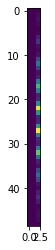

In [13]:
plt.imshow(im)

In [14]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'